In [1]:
# Imports
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import helper_functions as hf

# Model XLRM

* External factors
* Levers
* Relations
* Metrics of performance

## System:

In [2]:
# Classes
class demand_class:
    """Demand points such as affected cities or villages"""

    def __init__(self, name):
        self.name = "DP{}".format(name)
        self.type = "demand"
        self.x = random.randint(0, size_area)
        self.y = random.randint(0, size_area)
        self.location = (self.x, self.y)

        # create random demand (random impacted area)
        self.demand = random.random() * 1000


class supply_class:
    """Supply points such as airports or seaports"""

    def __init__(self, name):
        self.name = "SP{}".format(name)
        self.type = "supply"
        self.x = random.randint(0, size_area)
        self.y = random.randint(0, size_area)
        self.location = (self.x, self.y)
        self.supply = random.random() * 1000


class facility_class:
    """(Temporary) Distribution centers to distribute supply to demand"""

    def __init__(self, name):
        self.name = "FL{}".format(name)
        self.type = "facility"
        self.x = random.randint(0, size_area)
        self.y = random.randint(0, size_area)
        self.location = (self.x, self.y)
        self.operational = 0
    
    @property
    def location2(self):
        return (self.x,self.y)


# Class is unneccessary
# class country:
#     """The combination of all demand and supply points and facility locations"""

#     def __init__(self, name):
#         self.name = name

In [48]:
# Globals
size_area = 10
nr_demand_points = 10
nr_supply_points = 1
optional_FL = 10
max_nr_FL = 2

unit_transport_cost = 1

## External Factors: Define model

In [5]:
# Impact --> Demand

## Levers 

In [6]:
# operational_facilities = [fl1,fl2,fl3,fl4]

# constraints:
# fl1,fl2,fl3,fl4: (0,1) # 0: not operational, 1: operational

## Relations 

### Instantiate model

In [7]:
# Instantiate model

# Create airport as a supply point
supply_points = []
for i in range(nr_supply_points):
    supply_points.append(supply_class(name=i))

# Create demand points
demand_points = []
for i in range(nr_demand_points):
    demand_points.append(demand_class(name=i))

# Create possible facility locations
facility_locations = []
for i in range(optional_FL):
    facility_locations.append(facility_class(name=i))

In [8]:
# Organise all nodes and create distance matrix
all_nodes = supply_points + facility_locations + demand_points
nr_nodes = len(all_nodes)

# distance matrix
distances = np.zeros([nr_nodes, nr_nodes])

def calculate_distance(x1, y1, x2, y2):
    dx = x1 - x2
    dy = y1 - y2
    return (dx**2 + dy**2)**0.5




# # validated: calculate_distance function
# calculate_distance (-1,-1,2,3)
# #returns 5.0. # dx = 3, dy = 4 --> distance = 5


# calculate distance matrix
for i in range(len(all_nodes)):
    # Give all nodes in model an identifier corresponding to position in matrix
    all_nodes[i].id = i
    for j in range(len(all_nodes)):
        dist_ij = calculate_distance(all_nodes[i].x, all_nodes[i].y,
                                     all_nodes[j].x, all_nodes[j].y)
        distances[i, j] = dist_ij



## Metrics of performance

#### transportation costs

$$Transportation\_costs=\sum_{i=0}^{FL}\sum_{i=0}^{SP\&DP} distance_{FL,SP|DP} * costs$$

Calculates the costs of transportation between all facility locations to all supply and demand points 

In [9]:
# function calculate transportation costs
def calc_transportation_costs(supply_points, demand_points, facility_locations,
                              distances):
    transport_costs = 0

    for fl in facility_locations:  # For each facility location
        #         print(fl.__dict__)
        if fl.operational == 1:

            for a in supply_points + demand_points:  #for each supply and demand point
                #     print (a.__dict__)

#                 print(fl.id)
                #print(distances[a.id, fl.id] * unit_transport_cost)
                transport_costs = transport_costs + distances[a.id, fl.
                                                              id] * unit_transport_cost  #add costs of transportation

    return transport_costs


# requires validation

In [11]:
# # Objective functions
# # opening costs: objective from gutjahr & Dzubur 2016
# # costs = construction_costs + transportation_costs

# # objective 1

# construction_costs = 0
# transportation_costs = calc_transportation_costs
# costs = transportation_costs + construction_costs
# minimise(costs)

# Case results 

In [58]:
for i in facility_locations:
    i.operational = 1

    print(i.name,i.id,
          calc_transportation_costs(supply_points, demand_points,
                                    facility_locations, distances))

    i.operational = 0

FL0 1 261.42101671988945
FL1 2 171.66150564382443
FL2 3 138.16050737126915
FL3 4 142.73988102718147
FL4 5 98.32112437817268
FL5 6 98.22688599828166
FL6 7 110.29336697823663
FL7 8 97.70607846682141
FL8 9 35.48769273757518
FL9 10 73.13876658969963


## graphical representation of case

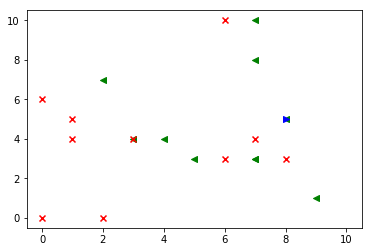

In [13]:
plt.axis([-0.5,10.5,-0.5,10.5])

for x in demand_points:
    plt.scatter(x.x, x.y,c="green",marker="<")
for x in facility_locations:
    plt.scatter(x.x, x.y,c="red", marker="x")
for x in supply_points:
    plt.scatter(x.x, x.y,c="blue", marker=">")


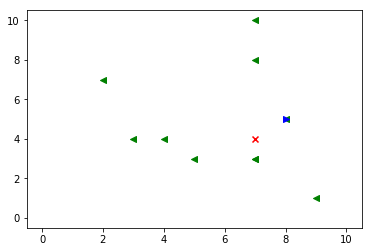

In [47]:
plt.axis([-0.5,10.5,-0.5,10.5])

for x in demand_points:
    plt.scatter(x.x, x.y,c="green",marker="<")
for x in facility_locations:
    if x.id == 2:
        plt.scatter(x.x, x.y,c="red", marker="x")
for x in supply_points:
    plt.scatter(x.x, x.y,c="blue", marker=">")


# Platypus optimisation

In [14]:
# imports
from platypus import NSGAII, Problem, Binary, Real, Integer

In [15]:
def FL_model(d_vars):

    # set global operational FL
    for i in range(len(d_vars)):
        facility_locations[i].operational = d_vars[i]

    trans_costs = calc_transportation_costs(supply_points, demand_points,
                                      facility_locations, distances)

    costs = trans_costs #+ other costs
    
    objectives = [
        costs,
    ]
    constraints = [sum(d_vars),]

    return objectives, constraints

In [54]:
# nr of decision variables, number of objectives, number of constraints
problem = Problem(optional_FL, 1, 1)

# Decision variables for possible facility locations
problem.types[:] = [Integer(0,1) for a in range(optional_FL)]

# constraint: number of total operation FL
problem.constraints[:] = "=={}".format(max_nr_FL)
problem.function = FL_model

algorithm = NSGAII(problem)
algorithm.run(10000)

'==2'

In [17]:
from platypus import nondominated

In [55]:
a = nondominated (algorithm.result)

In [57]:
a

[Solution[[False],[True],[False],[False],[False],[False],[False],[False],[True],[False]|68.98869101013045|0.0],
 Solution[[False],[True],[False],[False],[False],[False],[False],[False],[True],[False]|68.98869101013045|0.0],
 Solution[[False],[True],[False],[False],[False],[False],[False],[False],[True],[False]|68.98869101013045|0.0],
 Solution[[False],[True],[False],[False],[False],[False],[False],[False],[True],[False]|68.98869101013045|0.0],
 Solution[[False],[True],[False],[False],[False],[False],[False],[False],[True],[False]|68.98869101013045|0.0],
 Solution[[False],[True],[False],[False],[False],[False],[False],[False],[True],[False]|68.98869101013045|0.0],
 Solution[[False],[True],[False],[False],[False],[False],[False],[False],[True],[False]|68.98869101013045|0.0],
 Solution[[False],[True],[False],[False],[False],[False],[False],[False],[True],[False]|68.98869101013045|0.0],
 Solution[[False],[True],[False],[False],[False],[False],[False],[False],[True],[False]|68.9886910101304

In [56]:
for i in a[0].objectives:
    print(i)

68.98869101013045


In [44]:
a[0].objectives[0]

33.50099827255527

In [46]:
set([i.objectives[0] for i in a])

{33.50099827255527}

# Next steps

Choices:
- Capacitated vs uncapacitated?
- Endogenous vs exogenous number of facilities each optimisation step (exogenous: 1 each time)

Do:
- Assign demand points to closest facilities
- optimise with only distance to demand points

How:
- create for each demand class a "allocated facility"
- Only add costs for distances between "linked" demand-facility points
- look at paper guthjahr? user equilibrium?